In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

class CustomActivation(nn.Module):
    def __init__(self):
        super(CustomActivation, self).__init__()
        # Initialize k0 and k1 as trainable parameters
        self.k0 = nn.Parameter(torch.randn(1), requires_grad=True)
        self.k1 = nn.Parameter(torch.randn(1), requires_grad=True)

    def forward(self, x):
        return self.k0 + self.k1 * x


class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        # Define the layers
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.custom_activation = CustomActivation()  # Use custom activation
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)  # For multi-class classification

    def forward(self, x):
        # Forward pass
        x = self.layer1(x)
        x = self.custom_activation(x)  # Apply custom activation
        x = self.layer2(x)
        return self.softmax(x)  # Apply softmax at the output layer




In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [3]:
# Define model, loss, and optimizer
model = SimpleNN(input_size=4, hidden_size=10, output_size=3)
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update model parameters

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.9640
Epoch [20/100], Loss: 0.8113
Epoch [30/100], Loss: 0.7465
Epoch [40/100], Loss: 0.7139
Epoch [50/100], Loss: 0.6808
Epoch [60/100], Loss: 0.6456
Epoch [70/100], Loss: 0.6193
Epoch [80/100], Loss: 0.6043
Epoch [90/100], Loss: 0.5953
Epoch [100/100], Loss: 0.5901


In [4]:
# Model evaluation
with torch.no_grad():  # Disable gradient computation for testing
    test_outputs = model(X_test)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 96.67%


In [17]:
# Convert X_test to PyTorch tensor
X_test = torch.tensor(X_test, dtype=torch.float32)

y_pred=model(X_test)

In [22]:
from sklearn.metrics import confusion_matrix

# Convert X_test to PyTorch tensor
X_test = torch.tensor(X_test, dtype=torch.float32)

y_pred = model(X_test)

# Detach y_pred from the computation graph and convert it to a NumPy array
y_pred = y_pred.detach().numpy()

# Assuming y_pred contains probabilities for two classes, convert to binary predictions
y_pred = (y_pred[:, 1] > 0.5).astype(int) # Assuming the second column represents probability of class 1

confusion_matrix(y_test,y_pred)

<ipython-input-22-f0fdf6bdb351>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)


array([[39,  4],
       [ 0, 71]])

In [24]:
import pandas as pd
from sklearn.metrics import recall_score,precision_score,f1_score
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred))
print(cdf)

print("Precision - ",precision_score(y_test,y_pred))
print("Recall - ",recall_score(y_test,y_pred))
print("F1 score - ",f1_score(y_test,y_pred))

    0   1
0  39   4
1   0  71
Precision -  0.9466666666666667
Recall -  1.0
F1 score -  0.9726027397260273


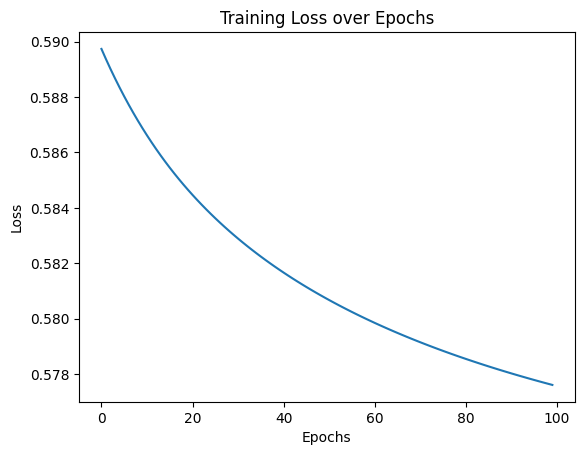

In [5]:
import matplotlib.pyplot as plt

# Plot loss over epochs (collect loss during training)
losses = []

for epoch in range(num_epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Plot the loss curve
plt.plot(range(num_epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

In [6]:
# Checking for diffrent dataset
#breast cancer

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = CustomActivation()  # Using custom activation function
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)  # Apply custom activation
        out = self.fc2(out)
        return out

In [8]:
# Initialize model
input_size = X_train.shape[1]  # Number of features
hidden_size = 32  # Number of hidden units
num_classes = 2  # Number of output classes for binary classification (malignant/benign)

model = NeuralNetwork(input_size, hidden_size, num_classes)

In [9]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [11]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(torch.tensor(X_train, dtype=torch.float32)) # Convert X_train to a PyTorch tensor
    loss = criterion(outputs, torch.tensor(y_train, dtype=torch.long)) # Convert y_train to a PyTorch tensor

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.5322
Epoch [20/100], Loss: 0.4206
Epoch [30/100], Loss: 0.3357
Epoch [40/100], Loss: 0.2713
Epoch [50/100], Loss: 0.2237
Epoch [60/100], Loss: 0.1891
Epoch [70/100], Loss: 0.1639
Epoch [80/100], Loss: 0.1452
Epoch [90/100], Loss: 0.1310
Epoch [100/100], Loss: 0.1200


In [14]:
# Evaluate the model on the test set
with torch.no_grad():
    outputs = model(torch.tensor(X_test, dtype=torch.float32)) # Convert X_test to a PyTorch tensor
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == torch.tensor(y_test, dtype=torch.long)).sum().item() / len(y_test) # Convert y_test to a PyTorch tensor and use len to get the size
    print(f'Accuracy on test set: {accuracy * 100:.2f}%')

Accuracy on test set: 97.37%
